In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [2]:
from sklearn.model_selection import train_test_split

# Load the MNIST dataset
data = pd.read_csv('data.csv')

In [3]:
# data = data.sample(frac=1, random_state=42)  

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data = data.drop(["id", "Unnamed: 32"], axis=1)

In [6]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# Split the data into training and testing sets
data["diagnosis"] = data["diagnosis"].replace({"M": 1, "B": 0})
X_train, X_test, Y_train, Y_test = train_test_split(
    data.drop("diagnosis", axis=1), data["diagnosis"], test_size=0.2, random_state=42)

In [33]:
data.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [9]:
mean = X_train.mean(axis = 0)
std = X_train.std(axis = 0)
# print(mean, std)

In [10]:
X_train = (X_train - mean)/std

In [11]:
X_test = (X_test - mean)/std

In [12]:
X_train = X_train.values
Y_train = Y_train.values

In [13]:
# Convert the labels to binary format
# data["diagnosis"] = data["diagnosis"].replace({"M": 1, "B": 0})
# Y_train = data["diagnosis"]

In [14]:
def sigmoid(X):
    return 1.0/(1.0 + np.exp(-X))

In [15]:
def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

In [16]:
def cost_function(X, Y, theta):
    h_theta = hypothesis(X, theta)
    cost = np.mean(Y*np.log(h_theta) + (1 - Y)*np.log(1 - h_theta))
    cost = cost*-1

    return cost

In [17]:
def gradient(X, Y, theta):

    h_theta = hypothesis(X, theta)
    
#     print(type(Y), type(h_theta))

    grad = np.dot(X.T, (Y - h_theta))

    return grad/X.shape[0]

In [18]:
def gradient_descent(X, Y, learning_rate = 0.001, max_steps = 500):

    m, n = X.shape
    theta = np.zeros((n, 1))
    cost_epoch = []

    for i in range(max_steps):

        grad = gradient(X, Y, theta)

        e = cost_function(X, Y, theta)
        cost_epoch.append(e)

        theta = theta + learning_rate*grad

    return (theta, cost_epoch)

In [19]:
ones = np.ones((X_train.shape[0], 1))
X_train = np.hstack((ones, X_train))
print(X_train[:4, :4], X_train.shape)
Y_train = Y_train.reshape((-1, 1))
# Y_train = Y_train.to_numpy().reshape((-1, 1))

[[ 1.         -1.43916885 -0.43484083 -1.36058735]
 [ 1.          1.97192566  1.7311203   2.08937187]
 [ 1.         -1.39844274 -1.24824831 -1.3437302 ]
 [ 1.         -0.98071729  1.41466494 -0.9815071 ]] (455, 31)


In [20]:
X_train.shape

(455, 31)

In [21]:
Y_train.shape

(455, 1)

In [22]:
theta, cost_epoch = gradient_descent(X_train, Y_train, learning_rate=0.001, max_steps = 1000)

In [23]:
cost_epoch[-10:]

[0.2561524690550531,
 0.25604669680884534,
 0.25594107180883285,
 0.2558355937185004,
 0.2557302622023983,
 0.25562507692613873,
 0.2555200375563912,
 0.2554151437608783,
 0.25531039520837173,
 0.2552057915686879]

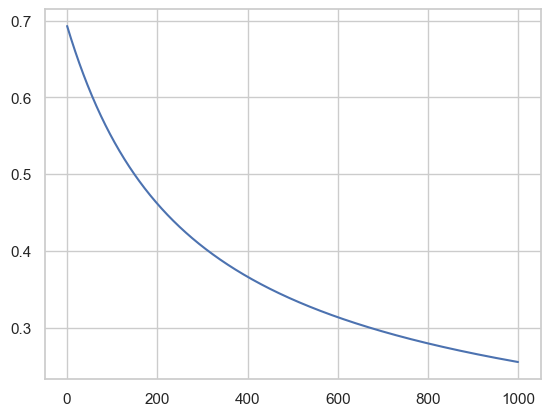

In [24]:
plt.plot(cost_epoch)

In [25]:
ones = np.ones((X_test.shape[0], 1))
X_test = np.hstack((ones, X_test))
print(X_test[:4, :4], X_test.shape)
Y_test = np.array(Y_test)
Y_test = Y_test.reshape((-1, 1))
# Y_train = Y_train.to_numpy().reshape((-1, 1))

[[ 1.         -0.46598452 -0.13713838 -0.44372296]
 [ 1.          1.36386222  0.49811645  1.30407547]
 [ 1.          0.3796479   0.06914363  0.40365708]
 [ 1.         -0.48578193 -0.35279685 -0.42809927]] (114, 31)


In [26]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(455, 31) (455, 1) (114, 31) (114, 1)


In [27]:
def predict(X, theta):
    h_theta = hypothesis(X, theta)
    output = np.zeros(h_theta.shape)

    output[h_theta>0.5] = 1
    output = output.astype('int')

    return output

In [28]:
train_preds = predict(X_train, theta)
test_preds = predict(X_test, theta)

In [29]:
for i in range(len(test_preds)):
    print(test_preds[i], Y_test[i])

[0] [0]
[1] [1]
[1] [1]
[0] [0]
[0] [0]
[1] [1]
[1] [1]
[1] [1]
[1] [0]
[0] [0]
[0] [0]
[1] [1]
[0] [0]
[1] [1]
[0] [0]
[1] [1]
[0] [0]
[0] [0]
[0] [0]
[1] [1]
[0] [1]
[0] [0]
[1] [1]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[1] [1]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[1] [1]
[0] [0]
[1] [1]
[0] [0]
[0] [0]
[1] [1]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[1] [1]
[1] [1]
[1] [0]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[1] [1]
[1] [1]
[0] [0]
[0] [0]
[1] [1]
[1] [1]
[0] [0]
[0] [0]
[0] [0]
[1] [1]
[1] [1]
[0] [0]
[0] [0]
[1] [1]
[1] [1]
[0] [0]
[1] [1]
[0] [0]
[0] [0]
[0] [0]
[1] [1]
[0] [0]
[0] [0]
[1] [1]
[0] [0]
[1] [1]
[1] [1]
[1] [1]
[1] [1]
[1] [1]
[1] [1]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[1] [1]
[1] [1]
[0] [0]
[1] [1]
[1] [1]
[0] [0]
[1] [1]
[1] [1]
[0] [0]
[0] [0]
[0] [0]
[1] [1]
[0] [0]
[0] [0]
[1] [1]
[0] [0]
[0] [0]
[1] [1]


In [30]:
def accuracy(preds, labels):
    labels = labels.astype('int')
    print(np.sum(preds == labels)/labels.shape[0])

In [31]:
accuracy(test_preds, Y_test)

0.9736842105263158


In [32]:
accuracy(train_preds, Y_train)

0.9516483516483516
